




 
 
 You will have to import five different datasets. Each one is an exchange traded fund (etf) offered by Vanguard that hold a collection of securities (stocks). You could technically buy one of these and own all the businesses that are part of that etf. Pretty cool.

The composition of each etf is market capitalization weighted. That means that the bigger the company is in terms of market value (think Apple with its trillion dollar market cap), the more of your dollars that you invest in that etf goes to this one stock. That is shown below.

![Large companies dominate...](large-companies-dominate-total-stock-market-index.png)

But you don't want that. What you want is this...

![A more proportional portfolio...](spreading-your-dollars-across-all-size-companies.png)

Let's explore one of those etfs.

In [1]:
import pandas as pd
pd.read_csv('vti_12_31_2019.csv').head(10)

,Unnamed: 0,date,holding,marketValue
0,0,2019-12-31,Microsoft Corp.,3.388885e+10
1,1,2019-12-31,Apple Inc.,3.307893e+10
2,2,2019-12-31,Amazon.com Inc.,2.193640e+10
3,3,2019-12-31,Facebook Inc.,1.391406e+10
4,4,2019-12-31,Berkshire Hathaway Inc.,1.208788e+10
5,5,2019-12-31,JPMorgan Chase & Co.,1.157386e+10
6,6,2019-12-31,Alphabet Inc.,1.129601e+10
7,7,2019-12-31,Alphabet Inc. Class C,1.100778e+10
8,8,2019-12-31,Johnson & Johnson,1.081596e+10
9,9,2019-12-31,Visa Inc.,9.063540e+09


So these are the top ten holdings within this etf. The marketValue column for each holding tells us the amount of money that goes towards that holding if we were to make an investment in this etf. To find % ownership for each holding, you can divide the marketValue for that holding with the total sum of marketValues for all holdings in that etf.

A brief discreption on the etfs...

[VTI](https://investor.vanguard.com/etf/profile/VTI) - Total stock market etf. It technically owns all the publicly traded companies in these United States.

[VO](https://investor.vanguard.com/etf/profile/vo) - Mid-size company etf. It owns companies that are not too larger or small.

[VB](https://investor.vanguard.com/etf/profile/vb) - Small-size company etf. It owns companies that are small in market value.

[VOO](https://investor.vanguard.com/etf/profile/voo) - These are all the companies that are part of the S&P 500 index. This is basically a large cap index and almost all companies within this are also found in VTI.

[VXF](https://investor.vanguard.com/etf/profile/vxf) - These are all the companies that are part of VTI but excluding those that are found in the S&P 500 index. Which means VXF + VOO = VTI.

### Question

Say you had a 100 dollars to invest and you were to split that equally between these 5 etfs. How will your money be divvied up between the companies within that combined portfolio (hint: use merge in combining datasets). 

- What portion of your money will go to the top 50 companies?
- What portion to the next 450 companies?
- And what to the remaining set of companies?

Visualizations come in handy but are not necessary. Be as creative as possible. There might be overlap in holdings between etfs and you might have to use regular expressions to clean some things out to match holdings.

In [144]:
import pandas as pd
vti = pd.read_csv('vti_12_31_2019.csv')
vti = vti.drop(columns=['Unnamed: 0'])
total=vti['marketValue'].sum()
vti['etf percent']=vti['marketValue']/total
vti['amount']=vti['etf percent']*20          # $20 is used for this ETF, so divide $20 among the funds
vti

,date,holding,marketValue,etf percent,amount
0,2019-12-31,Microsoft Corp.,3.388885e+10,3.786959e-02,7.573918e-01
1,2019-12-31,Apple Inc.,3.307893e+10,3.696454e-02,7.392908e-01
2,2019-12-31,Amazon.com Inc.,2.193640e+10,2.451315e-02,4.902631e-01
3,2019-12-31,Facebook Inc.,1.391406e+10,1.554847e-02,3.109694e-01
4,2019-12-31,Berkshire Hathaway Inc.,1.208788e+10,1.350778e-02,2.701556e-01
...,...,...,...,...,...
3545,2019-12-31,Jones Energy Inc. Class A,8.000000e+00,8.939718e-12,1.787944e-10
3546,2019-12-31,THESTREET Inc. CVR1,2.000000e+00,2.234929e-12,4.469859e-11
3547,2019-12-31,Harvest Natural Resources Inc.,1.000000e+00,1.117465e-12,2.234929e-11
3548,2019-12-31,Universal Travel Group,0.000000e+00,0.000000e+00,0.000000e+00


In [143]:
vo = pd.read_csv('vo_12_31_2019.csv')
vo = vo.drop(columns=['Unnamed: 0'])
total=vo['marketValue'].sum()
vo['etf percent']=vo['marketValue']/total
vo['amount']=vo['etf percent']*20          # $20 is used for this ETF, so divide $20 among the funds
vo

,date,holding,marketValue,etf percent,amount
0,2019-12-31,Newmont Goldcorp Corp.,896765462.0,8.060491e-03,0.161210
1,2019-12-31,Amphenol Corp. Class A,807963791.0,7.262306e-03,0.145246
2,2019-12-31,ONEOK Inc.,787016807.0,7.074026e-03,0.141481
3,2019-12-31,WEC Energy Group Inc.,732058286.0,6.580036e-03,0.131601
4,2019-12-31,IHS Markit Ltd.,722329137.0,6.492587e-03,0.129852
...,...,...,...,...,...
334,2019-12-31,Levi Strauss & Co. Class A,21514831.0,1.933840e-04,0.003868
335,2019-12-31,Lennar Corp. Class B,9520251.0,8.557187e-05,0.001711
336,2019-12-31,ViacomCBS Inc. Class A,6668086.0,5.993546e-05,0.001199
337,2019-12-31,News Corp. Class B,5167272.0,4.644553e-05,0.000929


In [145]:
vb = pd.read_csv('vb_12_31_2019.csv')
vb = vb.drop(columns=['Unnamed: 0'])
total=vb['marketValue'].sum()
vb['etf percent']=vb['marketValue']/total
vb['amount']=vb['etf percent']*20          # $20 is used for this ETF, so divide $20 among the funds
vb

,date,holding,marketValue,etf percent,amount
0,2019-12-31,Leidos Holdings Inc.,347521932.0,3.625613e-03,7.251226e-02
1,2019-12-31,Zebra Technologies Corp.,344245760.0,3.591434e-03,7.182867e-02
2,2019-12-31,Atmos Energy Corp.,334201885.0,3.486648e-03,6.973297e-02
3,2019-12-31,IDEX Corp.,327868292.0,3.420571e-03,6.841143e-02
4,2019-12-31,STERIS plc,322979504.0,3.369568e-03,6.739136e-02
...,...,...,...,...,...
1352,2019-12-31,AMAG Pharmaceuticals Inc.,33139.0,3.457313e-07,6.914625e-06
1353,2019-12-31,Altisource Portfolio Solutions SA,19775.0,2.063078e-07,4.126157e-06
1354,2019-12-31,Synergy Pharmaceuticals Inc.,12807.0,1.336124e-07,2.672247e-06
1355,2019-12-31,Ashford Inc.,614.0,6.405715e-09,1.281143e-07


In [146]:
voo = pd.read_csv('voo_12_31_2019.csv')
total=voo['marketValue'].sum()
voo = voo.drop(columns=['Unnamed: 0'])
voo['etf percent']=voo['marketValue']/total
voo['amount']=voo['etf percent']*20          # $20 is used for this ETF, so divide $20 among the funds
voo

,date,holding,marketValue,etf percent,amount
0,2019-12-31,Apple Inc.,2.450349e+10,4.585529e-02,9.171059e-01
1,2019-12-31,Microsoft Corp.,2.403557e+10,4.497965e-02,8.995931e-01
2,2019-12-31,Amazon.com Inc.,1.537491e+10,2.877227e-02,5.754454e-01
3,2019-12-31,Facebook Inc. Class A,9.868079e+09,1.846691e-02,3.693382e-01
4,2019-12-31,JPMorgan Chase & Co.,8.651537e+09,1.619030e-02,3.238060e-01
...,...,...,...,...,...
504,2019-12-31,Coty Inc. Class A,6.657366e+07,1.245845e-04,2.491690e-03
505,2019-12-31,Macerich Co.,3.955086e+06,7.401463e-06,1.480293e-04
506,2019-12-31,Lennar Corp. Class B,3.440783e+06,6.439007e-06,1.287801e-04
507,2019-12-31,News Corp. Class B,2.135730e+05,3.996759e-07,7.993518e-06


In [147]:
vxf = pd.read_csv('vxf_12_31_2019.csv')
vxf = vxf.drop(columns=['Unnamed: 0'])
total=vxf['marketValue'].sum()
vxf['etf percent']=vxf['marketValue']/total
vxf['amount']=vxf['etf percent']*20          # $20 is used for this ETF, so divide $20 among the funds
vxf

,date,holding,marketValue,etf percent,amount
0,2019-12-31,Tesla Inc.,844923272.0,1.145656e-02,2.291312e-01
1,2019-12-31,Blackstone Group LP,524426088.0,7.110846e-03,1.422169e-01
2,2019-12-31,Lululemon Athletica Inc.,393325388.0,5.333214e-03,1.066643e-01
3,2019-12-31,Workday Inc. Class A,359631265.0,4.876345e-03,9.752691e-02
4,2019-12-31,Palo Alto Networks Inc.,321314013.0,4.356791e-03,8.713581e-02
...,...,...,...,...,...
3244,2019-12-31,Priority Technology Holdings Inc.,260.0,3.525416e-09,7.050832e-08
3245,2019-12-31,Cohen & Co. Inc.,253.0,3.430501e-09,6.861002e-08
3246,2019-12-31,InnSuites Hospitality Trust,165.0,2.237283e-09,4.474566e-08
3247,2019-12-31,Harvest Natural Resources Inc.,1.0,1.355929e-11,2.711858e-10


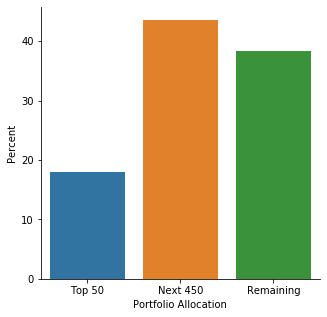

In [117]:
invest=pd.concat([vti,vo,vb,voo,vxf])   # combine all holdings from 5 ETF into one table

# since a holding might appear in multiple EFTs, we need to group the rows based on the holding
# so we could calculate how much total money is invested in each holding.
investGroup=invest.groupby('holding')['amount'].sum().sort_values(ascending=False)
top50 = investGroup.head(50)           # first 50 rows, i.e from row 0 to row 49
next450 = investGroup.iloc[50:500]     # next 450 rows, i.e. from row 50 to row 499
theRest = investGroup.iloc[500:]       # the remaining rows, i.e. from row 500 on

# Now create a table with 3 groups as columns "Top 50", "Next 450", and "Remaining", 
# and the percentage as row value
# Note: Since the total amount is $100, the sum of each group will be equal to the percentage.
investPortions = pd.DataFrame({ 
    'Group' : ['Top 50', 'Next 450', 'Remaining'],
    'Percent': [top50.sum(), next450.sum(), theRest.sum()]
})

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(5,5))
tidy = investPortions.melt(id_vars='Group').rename(columns={'value':'Percent','Group':'Portfolio Allocation'})
sns.barplot(x='Portfolio Allocation', y='Percent', data=tidy, ax=ax1)
sns.despine(fig)

In [118]:
# The percentage of the top 50 holdings allocated from the original investment amount of $100
top50.sum()

18.00625316482548

In [119]:
# The percentage of the next 450 holdings allocated from the original investment amount of $100
next450.sum()

43.58757432685666

In [120]:
# The percentage of the remaining holdings allocated from the original investment amount of $100
theRest.sum()

38.40617250831786

### Question

Try some other proportions out in how you will divvy up your portfolio to get broader exposure to more mid and small size companies. Provide your best allocation and state the reasons why. This is a more open-ended question so be as creative as possible.

Since VTI = VOO + VXF, if we devide $100 equally amont 5 ETFs as done previously, the actual allocation was 60% large companies, 20% mid-size companies and 20% small size companies.  This allocation gave less exposure to mid-size and small size companies.  If we eliminate the VOO and VXF fund allocation (since they are covered by VTI funds anyway), we will increase the exposure to more mid and small size companies in the allocation.

In absence of any data on return value for each holding in the last 5 or 10 years, we can't say which investment (large, mid size, or small size) would result in the best possible allocation.  To increase exposure to mid size and small company holdings, we probably should give these 3 categories equal allocation.   Thus, we could divide the $100 into 3 ETFs: VTI ($34), VB ($33), VO ($33).

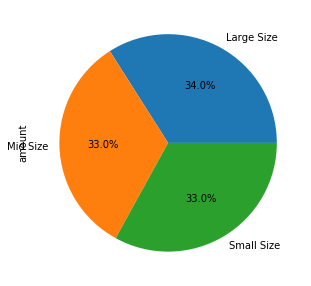

In [157]:
vti = pd.read_csv('vti_12_31_2019.csv')   # large size companies
total=vti['marketValue'].sum()
vti = vti.drop(columns=['Unnamed: 0'])
vti['etf percent']=vti['marketValue']/total
vti['amount']=vti['etf percent']*34
vti['type']='Large Size'

vo = pd.read_csv('vo_12_31_2019.csv')     # mid size companies
vo = vo.drop(columns=['Unnamed: 0'])
total=vo['marketValue'].sum()
vo['etf percent']=vo['marketValue']/total
vo['amount']=vo['etf percent']*33
vo['type']='Mid Size'

vb = pd.read_csv('vb_12_31_2019.csv')     # small size companies
vb = vb.drop(columns=['Unnamed: 0'])
total=vb['marketValue'].sum()
vb['etf percent']=vb['marketValue']/total
vb['amount']=vb['etf percent']*33
vb['type']='Small Size'

invest=pd.concat([vti,vo,vb])   # combine all holdings from 3 ETFs into one table

# since a holding might appear in multiple EFTs, we need to group the rows based on the holding
# so we could calculate how much total money is invested in each holding.
investGroup=invest.groupby('type')['amount'].sum()
pie=investGroup.plot.pie(y="type",autopct="%1.1f%%",figsize=(5,5))

However, the equal size of the three groups (Large Size, Mid Size, Small Size) did not imply that Mid Size and Small Size companies have more exposure than Large Size companies individually.  The following data showed that the top Large Size company "Microsoft" was allocated $1.29 out of $100 (ranked 1st), the top Mid Size company "Newmont Goldcorp" $0.27 (ranked 20th), and the top Small Size company "Leidos" $0.12 (ranked 152th).  In fact, most large size company stocks were at the top of the allocation list.

In [152]:
invest=invest.sort_values(by='amount',ascending=False)
invest['percent']=invest['amount']/100
invest['rank']=range(1,len(invest)+1)
invest[invest.type=='Large Size'].head(5)


,date,holding,marketValue,etf percent,amount,type,rank,percent
0,2019-12-31,Microsoft Corp.,3.388885e+10,0.037870,1.287566,Large Size,1,0.012876
1,2019-12-31,Apple Inc.,3.307893e+10,0.036965,1.256794,Large Size,2,0.012568
2,2019-12-31,Amazon.com Inc.,2.193640e+10,0.024513,0.833447,Large Size,3,0.008334
3,2019-12-31,Facebook Inc.,1.391406e+10,0.015548,0.528648,Large Size,4,0.005286
4,2019-12-31,Berkshire Hathaway Inc.,1.208788e+10,0.013508,0.459265,Large Size,5,0.004593


In [153]:
invest[invest.type=='Mid Size'].head(5)


,date,holding,marketValue,etf percent,amount,type,rank,percent
0,2019-12-31,Newmont Goldcorp Corp.,896765462.0,0.008060,0.265996,Mid Size,20,0.002660
1,2019-12-31,Amphenol Corp. Class A,807963791.0,0.007262,0.239656,Mid Size,24,0.002397
2,2019-12-31,ONEOK Inc.,787016807.0,0.007074,0.233443,Mid Size,25,0.002334
3,2019-12-31,WEC Energy Group Inc.,732058286.0,0.006580,0.217141,Mid Size,31,0.002171
4,2019-12-31,IHS Markit Ltd.,722329137.0,0.006493,0.214255,Mid Size,32,0.002143


In [154]:
invest[invest.type=='Small Size'].head(5)

,date,holding,marketValue,etf percent,amount,type,rank,percent
0,2019-12-31,Leidos Holdings Inc.,347521932.0,0.003626,0.119645,Small Size,152,0.001196
1,2019-12-31,Zebra Technologies Corp.,344245760.0,0.003591,0.118517,Small Size,156,0.001185
2,2019-12-31,Atmos Energy Corp.,334201885.0,0.003487,0.115059,Small Size,160,0.001151
3,2019-12-31,IDEX Corp.,327868292.0,0.003421,0.112879,Small Size,168,0.001129
4,2019-12-31,STERIS plc,322979504.0,0.003370,0.111196,Small Size,174,0.001112


Therefore, we should try to make a different allocation such that some Mid Size and/or Small Size companies would have the same percentage initially compared to the top Large Size companies.  After a few trials, I picked the following ratio:  Large Size 6%, Mid Size 31%, Small Size 63% of $100.  We will recalculate the allocation as follows:

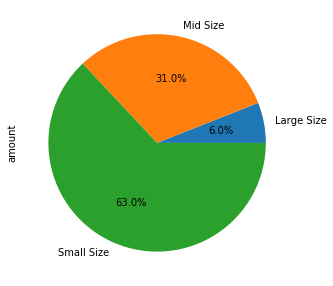

In [190]:
vti['amount']=vti['etf percent']*6
vo['amount']=vo['etf percent']*31
vb['amount']=vb['etf percent']*63
invest=pd.concat([vti,vo,vb])   # combine all holdings from 3 ETFs into one table
# since a holding might appear in multiple EFTs, we need to group the rows based on the holding
# so we could calculate how much total money is invested in each holding.
investGroup=invest.groupby('type')['amount'].sum()
pie=investGroup.plot.pie(y="type",autopct="%1.1f%%",figsize=(5,5))

Now if we list out the top 20 stocks in the allocation of $100, they are all either mid size or small size companies except for Microsoft at 3rd position and Apple at 6th position.  Also the bottom 20 stocks are all large size companies.  I believe this allocation would satisfy the requirement to give mid size and small size more exposure in the investment of $100.

In [191]:
invest=invest.sort_values(by='amount',ascending=False)
invest['percent']=invest['amount']/100
invest['rank']=range(1,len(invest)+1)
invest.head(20)

,date,holding,marketValue,etf percent,amount,type,percent,rank
0,2019-12-31,Newmont Goldcorp Corp.,8.967655e+08,0.008060,0.249875,Mid Size,0.002499,1
0,2019-12-31,Leidos Holdings Inc.,3.475219e+08,0.003626,0.228414,Small Size,0.002284,2
0,2019-12-31,Microsoft Corp.,3.388885e+10,0.037870,0.227218,Large Size,0.002272,3
1,2019-12-31,Zebra Technologies Corp.,3.442458e+08,0.003591,0.226260,Small Size,0.002263,4
1,2019-12-31,Amphenol Corp. Class A,8.079638e+08,0.007262,0.225131,Mid Size,0.002251,5
1,2019-12-31,Apple Inc.,3.307893e+10,0.036965,0.221787,Large Size,0.002218,6
2,2019-12-31,Atmos Energy Corp.,3.342019e+08,0.003487,0.219659,Small Size,0.002197,7
2,2019-12-31,ONEOK Inc.,7.870168e+08,0.007074,0.219295,Mid Size,0.002193,8
3,2019-12-31,IDEX Corp.,3.278683e+08,0.003421,0.215496,Small Size,0.002155,9
4,2019-12-31,STERIS plc,3.229795e+08,0.003370,0.212283,Small Size,0.002123,10


In [193]:
invest.tail(20)


,date,holding,marketValue,etf percent,amount,type,percent,rank
3530,2019-12-31,Envision Solar International Inc.,8388.0,9.373294e-09,5.623976e-08,Large Size,5.623976e-10,5227
3531,2019-12-31,Village Bank and Trust Financial Corp.,7450.0,8.325112e-09,4.995067e-08,Large Size,4.995067e-10,5228
3532,2019-12-31,Envela Corp.,6791.0,7.588703e-09,4.553222e-08,Large Size,4.553222e-10,5229
3533,2019-12-31,Houston American Energy Corp.,5613.0,6.272329e-09,3.763398e-08,Large Size,3.763398e-10,5230
3534,2019-12-31,Energy Transfer LP,4426.0,4.945899e-09,2.967539e-08,Large Size,2.967539e-10,5231
3535,2019-12-31,Patriot National Inc.,2986.0,3.336750e-09,2.002050e-08,Large Size,2.002050e-10,5232
3536,2019-12-31,NanoViricides Inc.,2427.0,2.712087e-09,1.627252e-08,Large Size,1.627252e-10,5233
3537,2019-12-31,Urban One Inc.,2085.0,2.329914e-09,1.397948e-08,Large Size,1.397948e-10,5234
3538,2019-12-31,Cyanotech Corp.,1374.0,1.535397e-09,9.212379e-09,Large Size,9.212379e-11,5235
3539,2019-12-31,Patriot National Bancorp Inc.,1276.0,1.425885e-09,8.555310e-09,Large Size,8.555310e-11,5236
